In [1]:
import os
import numpy as np
import glob
from astropy.io import fits
import pickle as pkl
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from astropy.table import Table, vstack, join
from scipy import stats
from scipy.optimize import curve_fit
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
from matplotlib.pyplot import cm
from scipy import stats
from scipy import interpolate
import matplotlib.ticker as mticker


repo_path = "/repo/main"
butler = Butler(repo_path)
registry = butler.registry

#ptc = butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.09.15/ptc.R03-S12.bfcorrected.final.fluxConserving.fullcovariance')


In [2]:
ptc = butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.10.09/ptc.R03-S12.trunc_to_pcti')
#ptc2 = butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.09.15/ptc.R03-S12.trunc_to_newpcti')


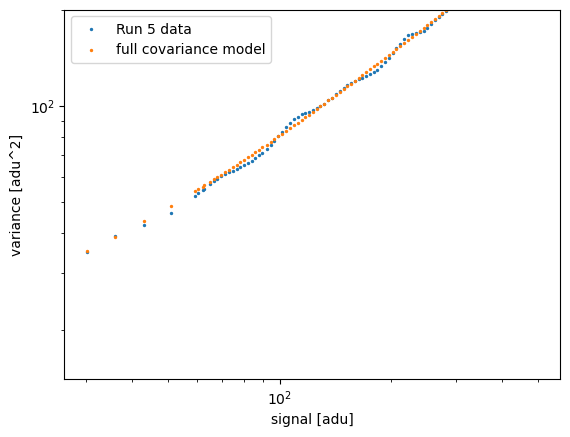

In [10]:
mask = ptc.finalMeans['C00'] < 500.
plt.scatter(ptc.finalMeans['C00'][mask], ptc.finalVars['C00'][mask], marker="o",s=2, label="Run 5 data")
plt.scatter(ptc.finalMeans['C00'][mask], ptc.covariancesModel['C00'][mask][:,0,0], marker="o",s=2, label="full covariance model")
#plt.plot([0,100000],[0,100000*(1/ptc.gain['C00'])])
plt.axhline(0)
plt.yscale("log")
plt.xscale("log")
plt.ylim(14,200)
plt.xlabel("signal [adu]")
plt.ylabel("variance [adu^2]")
plt.legend()


Text(0.5, 1.0, 'R03-S12')

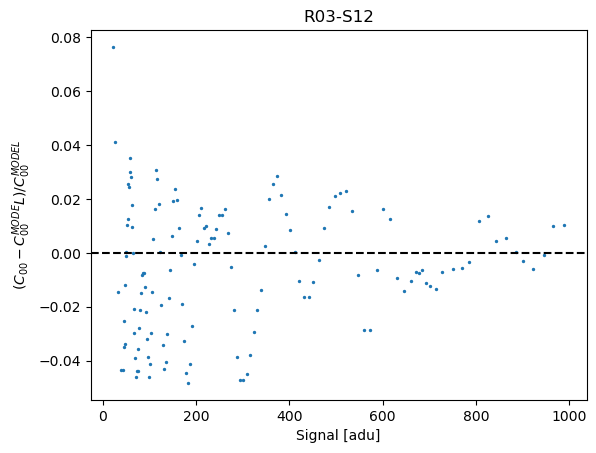

In [4]:
ptc = butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.10.09/ptc.R03-S12.trunc_to_pcti')
mask = ptc.finalMeans['C00'] < 1000.
plt.scatter(ptc.finalMeans['C00'][mask], (ptc.finalVars['C00'][mask] - ptc.covariancesModel['C00'][mask][:,0,0]) / ptc.covariancesModel['C00'][mask][:,0,0], marker="o",s=2)
#plt.scatter(ptc.finalMeans['C00'][mask], ptc.covariancesModel['C00'][mask][:,0,0], marker="o",s=2)
#plt.plot([0,100000],[0,100000*(1/ptc.gain['C00'])])
plt.axhline(0, linestyle="--", color="k")
#plt.yscale("log")
#plt.xscale("log")
#plt.ylim(14,200)
plt.ylabel("$(C_{00} - C_{00}^{MODE}L) / C_{00}^{MODEL}$")
plt.xlabel("Signal [adu]")
plt.title("R03-S12")


Text(0.5, 1.0, 'R24-S11')

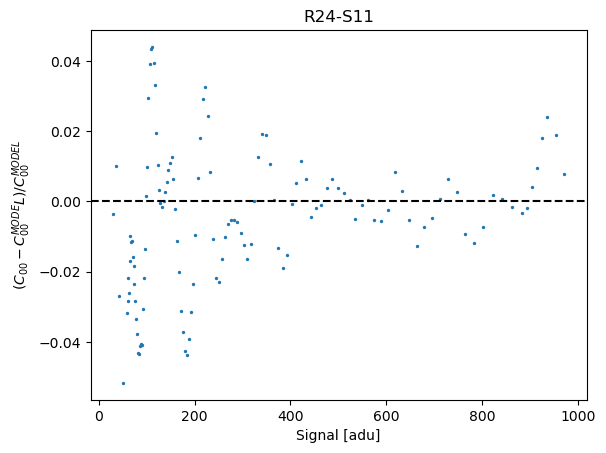

In [5]:
ptc = butler.get('ptc', detector=112, instrument='LSSTCam', collections='u/abrought/BF/2023.10.09/ptc.R24-S11.trunc_to_pcti')
mask = ptc.finalMeans['C00'] < 1000.
plt.scatter(ptc.finalMeans['C00'][mask], (ptc.finalVars['C00'][mask] - ptc.covariancesModel['C00'][mask][:,0,0]) / ptc.covariancesModel['C00'][mask][:,0,0], marker="o",s=2)
#plt.scatter(ptc.finalMeans['C00'][mask], ptc.covariancesModel['C00'][mask][:,0,0], marker="o",s=2)
#plt.plot([0,100000],[0,100000*(1/ptc.gain['C00'])])
plt.axhline(0, linestyle="--", color="k")
#plt.yscale("log")
#plt.xscale("log")
#plt.ylim(14,200)
plt.ylabel("$(C_{00} - C_{00}^{MODE}L) / C_{00}^{MODEL}$")
plt.xlabel("Signal [adu]")
plt.title("R24-S11")


In [26]:
ptc = butler.get('ptc', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.10.07/ptc.R03-S12.trunc_to_ptc.fullnoisematrix.15x15')

